<a href="https://colab.research.google.com/github/TassioGama/GTI-tassiogama/blob/main/RFTitanicML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [215]:
url = 'https://github.com/gustavowillam/ML/blob/main/trabalhos/2022/Trab2/train.csv?raw=true'
df = pd.read_csv(url)
url='https://github.com/gustavowillam/ML/blob/main/trabalhos/2022/Trab2/test.csv?raw=true'
df_teste = pd.read_csv(url)

In [216]:
df.info() #Informações do DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [217]:
df.shape  #Número de linhas e colunas

(891, 12)

In [218]:
df.corr() #Correlação entre colunas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [219]:
df.isnull().any() #Colunas com valores nulos

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [220]:
df.isna().sum() #Somando valores não nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [221]:
#Tirando média da Idade e substituindo aonde os valores são nulos
mediaidade = df['Age'].mean()
mediaidade = math.floor(mediaidade)
df.update(df['Age'].fillna(mediaidade))

mediaidade = df_teste['Age'].mean()
mediaidade = math.floor(mediaidade)
df_teste.update(df['Age'].fillna(mediaidade))
print(mediaidade)

30


In [222]:
#Tirando mediana da coluna Embarked e substituindo aonde os valores são nulos
medianaembarked = df['Embarked'].value_counts()
print(medianaembarked)
df.update(df['Embarked'].fillna('S'))
medianaembarked = df_teste['Embarked'].value_counts()
df_teste.update(df_teste['Embarked'].fillna('S'))



S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [223]:
#Drop coluna Name pois é irrelevante
df = df.drop(columns=['Name'])
df = df.drop(columns=['Fare'])
df = df.drop(columns=['Ticket'])
df = df.drop(columns=['Parch'])
df = df.drop(columns=['SibSp'])

df_teste = df_teste.drop(columns=['Name'])
df_teste = df_teste.drop(columns=['Fare'])
df_teste = df_teste.drop(columns=['Ticket'])
df_teste = df_teste.drop(columns=['Parch'])
df_teste = df_teste.drop(columns=['SibSp'])

In [224]:
#Transformar variáveis categóricas em numéricas
def convert_cat(df,col):
    """
    input: dataframe and col list of categorical columns
    output: dataframw with numerical values
    """
    for c in col:
        item_list = df[c].unique().tolist()
        enum=enumerate(item_list)
        d = dict((j,i) for i,j in enum)
        print(c)
        print(d)
        
        df[c].replace(d, inplace=True)
    return df


In [225]:

dtypes = df.dtypes.to_dict()      

for col_name, typ in dtypes.items():
    if (typ == 'object'): 
        print(col_name, type)
        convert_cat(df,[col_name])

dtypes = df_teste.dtypes.to_dict() 
for col_name, typ in dtypes.items():
    if (typ == 'object'): 
        print(col_name, type)
        convert_cat(df_teste,[col_name])    

Sex <class 'type'>
Sex
{'male': 0, 'female': 1}
Cabin <class 'type'>
Cabin
{nan: 0, 'C85': 1, 'C123': 2, 'E46': 3, 'G6': 4, 'C103': 5, 'D56': 6, 'A6': 7, 'C23 C25 C27': 8, 'B78': 9, 'D33': 10, 'B30': 11, 'C52': 12, 'B28': 13, 'C83': 14, 'F33': 15, 'F G73': 16, 'E31': 17, 'A5': 18, 'D10 D12': 19, 'D26': 20, 'C110': 21, 'B58 B60': 22, 'E101': 23, 'F E69': 24, 'D47': 25, 'B86': 26, 'F2': 27, 'C2': 28, 'E33': 29, 'B19': 30, 'A7': 31, 'C49': 32, 'F4': 33, 'A32': 34, 'B4': 35, 'B80': 36, 'A31': 37, 'D36': 38, 'D15': 39, 'C93': 40, 'C78': 41, 'D35': 42, 'C87': 43, 'B77': 44, 'E67': 45, 'B94': 46, 'C125': 47, 'C99': 48, 'C118': 49, 'D7': 50, 'A19': 51, 'B49': 52, 'D': 53, 'C22 C26': 54, 'C106': 55, 'C65': 56, 'E36': 57, 'C54': 58, 'B57 B59 B63 B66': 59, 'C7': 60, 'E34': 61, 'C32': 62, 'B18': 63, 'C124': 64, 'C91': 65, 'E40': 66, 'T': 67, 'C128': 68, 'D37': 69, 'B35': 70, 'E50': 71, 'C82': 72, 'B96 B98': 73, 'E10': 74, 'E44': 75, 'A34': 76, 'C104': 77, 'C111': 78, 'C92': 79, 'E38': 80, 'D21': 8

In [226]:
#Cria as variáveis independentes e independente
X = df.copy()
X  = X.drop(['Survived'], axis=1) #remove a variável dependente do X
y = df.iloc[:, 1]

In [227]:
print(X)

     PassengerId  Pclass  Sex   Age  Cabin  Embarked
0              1       3    0  22.0      0         0
1              2       1    1  38.0      1         1
2              3       3    1  26.0      0         0
3              4       1    1  35.0      2         0
4              5       3    0  35.0      0         0
..           ...     ...  ...   ...    ...       ...
886          887       2    0  27.0      0         0
887          888       1    1  19.0    146         0
888          889       3    1  29.0      0         0
889          890       1    0  26.0    147         1
890          891       3    0  32.0      0         2

[891 rows x 6 columns]


In [228]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [229]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [230]:
from sklearn.ensemble import RandomForestClassifier

In [231]:
from sklearn.model_selection import GridSearchCV

def rf_param_selection(features, labels, kfolds):

    N_estimators  = [10, 100, 500, 1000]   #nr. de arvores na floresta 
    Max_depths    = [3 , 5  , 10 , 15  ]   #profundidade das arvores 

    param_grid = {'n_estimators': N_estimators, 'max_depth' : Max_depths}
    

    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=kfolds)
    grid_search.fit(features, labels)
    best_params = grid_search.best_params_
   
    return best_params  

In [232]:
best_params = rf_param_selection(X_train, np.array(y_train).ravel(), 5)

In [233]:
print(best_params)

{'max_depth': 5, 'n_estimators': 1000}


In [234]:
#criar o objeto com valores força bruta 
clf = RandomForestClassifier(n_estimators = 10,  max_depth=3, random_state = 0)
#clf = RandomForestClassifier(n_estimators = best_params['n_estimators'], max_depth = best_params['max_depth'], random_state = 0)

#ajustando o modelo 
clf.fit(X_train, y_train) 
       
y_pred_train = clf.predict(X_train)

#To retrieve the accuracy da classificação:
accuracy_train = clf.score(X_train, y_train)  #mede o score (acuracy) do modelo 
print('Acuracia do Treino:', accuracy_train)

Acuracia do Treino: 0.8230337078651685


In [235]:
print(y_pred_train)

[1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 

In [236]:
y_pred_test = clf.predict(X_test)

#To retrieve the accuracy da classificação:
accuracy_test = clf.score(X_test, y_test)  #mede o score (acuracy) do modelo 
print('Acuracia do Teste:', accuracy_test)

Acuracia do Teste: 0.8212290502793296


In [237]:
print(y_pred_test)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [238]:
y_pred_submit = clf.predict(df_teste)

In [239]:
# Import tools needed for visualization of trees 
from sklearn.tree import export_graphviz

#para gerar a arvore do RandomForest 
import pydot

#gerar arvore de decisão 
# Pull out one tree from the forest
tree = clf.estimators_[5]   #exibe a 5ª árvore gerada pelo RF

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_train.columns, rounded = True, precision = 1)


# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')


# Write graph to a png file
graph.write_png('Decision_tree.png')


In [240]:
#importância das features 
importances = clf.feature_importances_
print(importances)

[0.02515248 0.1181459  0.56728677 0.07526273 0.18368101 0.03047111]


In [241]:
#matriz de confusão 

from sklearn.metrics import confusion_matrix

#matriz de confusão do treinamento 
mc_train = confusion_matrix(y_train, y_pred_train)

In [242]:
print(mc_train)

[[417  22]
 [104 169]]


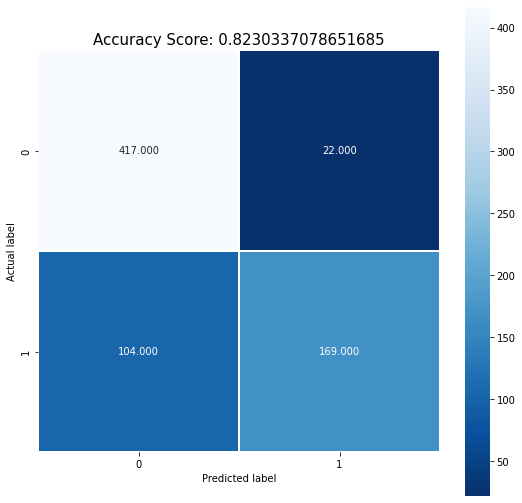

In [243]:
plt.figure(figsize=(9,9))
sns.heatmap(mc_train, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_train)
plt.title(all_sample_title, size = 15);

In [244]:
#matriz de confusão do teste
mc_test = confusion_matrix(y_test, y_pred_test)
print(mc_test)

[[104   6]
 [ 26  43]]


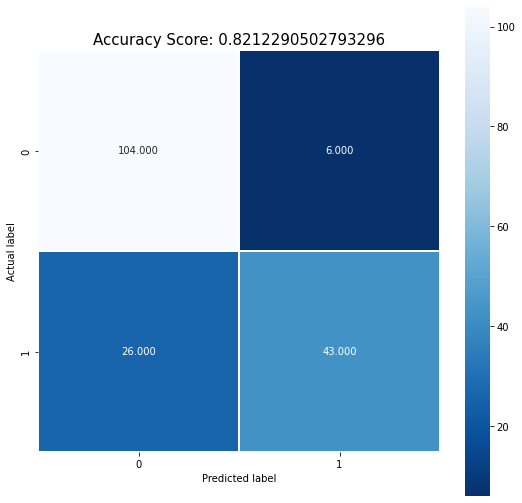

In [245]:
plt.figure(figsize=(9,9))
sns.heatmap(mc_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_test)
plt.title(all_sample_title, size = 15);

In [246]:
##precision, recall , f1-score, specificity

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#precision score
print('precision----------')
print(precision_score(y_test, y_pred_test))

#recall score 
print('recall----------')
print(recall_score(y_test, y_pred_test))

#f1 score
print('f1-score----------')
print(f1_score(y_test, y_pred_test))

#specificity score
vn, fp, fn, vp = confusion_matrix(y_test, y_pred_test).ravel()
specificity = vn / (vn+fp)

print('specificity----------')
print(specificity)

print('specificity----------')
recall_score(y_test, y_pred_test, pos_label=0)

#roc_auc score
print('roc_auc----------')
print(roc_auc_score(y_test, y_pred_test))


precision----------
0.8775510204081632
recall----------
0.6231884057971014
f1-score----------
0.7288135593220338
specificity----------
0.9454545454545454
specificity----------
roc_auc----------
0.7843214756258235


Area abaixo da curva
0.7844668619156091


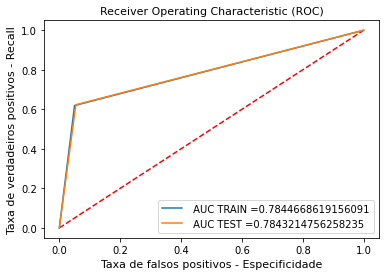

In [247]:
##############ROC Curve#################################################
# uma outra excelente ferramenta para análise de modelos de classificação é a curva ROC
#fonte
#Machine Learning Classifier evaluation using ROC and CAP Curves
#https://towardsdatascience.com/machine-learning-classifier-evaluation-using-roc-and-cap-curves-7db60fe6b716

from sklearn.metrics import roc_curve, roc_auc_score, auc

x_set = X_train
y_set = y_train
y_set_pred = y_pred_train

plt.plot([0,1], [0,1], 'r--')

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_pred_train)
test_fpr , test_tpr,  te_thresholds = roc_curve(y_test, y_pred_test)

print("Area abaixo da curva") 
print(roc_auc_score(y_set, y_set_pred))

#plt.plot(train_fpr, train_tpr)

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.xlabel('Taxa de falsos positivos - Especificidade', fontsize = 11)
plt.ylabel('Taxa de verdadeiros positivos - Recall', fontsize = 11)
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 11)
plt.show()

In [248]:
print(y_pred_train)

[1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 

In [249]:
print(y_pred_test)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [250]:
resultado = pd.DataFrame()
resultado['PassengerId'] = df_teste["PassengerId"]
resultado['Survived'] = y_pred_submit

In [251]:
print(resultado)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [252]:
resultado1 = resultado.round(1).astype(int)

In [253]:
df_teste_csv = resultado1.to_csv('submissaoRF.csv', index = False)